In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [ ]:
# Configuración de estilo de los gráficos
plt.style.use('ggplot')
# Cargar el dataset
data_url = "/content/framingham_clean.csv"
data = pd.read_csv(data_url)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mostrar las primeras filas del dataset
data.head()

# Resumen general del dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4240 non-null   int64  
 1   gender             4240 non-null   int64  
 2   age                4240 non-null   int64  
 3   education          4240 non-null   int64  
 4   currentSmoker      4240 non-null   int64  
 5   cigsPerDay         4240 non-null   int64  
 6   BPMeds             4240 non-null   object 
 7   prevalentStroke    4240 non-null   int64  
 8   prevalentHyp       4240 non-null   int64  
 9   diabetes           4240 non-null   int64  
 10  totChol            4240 non-null   int64  
 11  sysBP              4240 non-null   float64
 12  diaBP              4240 non-null   float64
 13  BMI                4240 non-null   float64
 14  heartRate          4240 non-null   int64  
 15  glucose            4240 non-null   int64  
 16  TenYearCHD         4240 

In [ ]:
# Resumen estadístico
summary_stats = data.describe()
print(summary_stats)


       Unnamed: 0       gender          age    education  currentSmoker  \
count   4240.0000  4240.000000  4240.000000  4240.000000    4240.000000   
mean    2119.5000     0.429245    49.580189     1.955189       0.494104   
std     1224.1269     0.495027     8.572942     1.018522       0.500024   
min        0.0000     0.000000    32.000000     1.000000       0.000000   
25%     1059.7500     0.000000    42.000000     1.000000       0.000000   
50%     2119.5000     0.000000    49.000000     2.000000       0.000000   
75%     3179.2500     1.000000    56.000000     3.000000       1.000000   
max     4239.0000     1.000000    70.000000     4.000000       1.000000   

        cigsPerDay  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4240.000000      4240.000000   4240.000000  4240.000000  4240.000000   
mean      8.944340         0.005896      0.310613     0.025708   236.667689   
std      11.904777         0.076569      0.462799     0.158280    44.328480   
min     

In [ ]:
# Verificación de valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)


Valores faltantes por columna:
 Unnamed: 0           0
gender               0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
age_groups           0
heart_rate_groups    0
dtype: int64


In [ ]:
# Limpieza de datos
# Reemplazar 'Missing' por 2 en BPMeds
data['BPMeds'] = data['BPMeds'].replace('Missing', 2)
# Convertir BPMeds a numérico
data['BPMeds'] = pd.to_numeric(data['BPMeds'])


In [ ]:
# Convertir gender a texto
data['gender'] = data['gender'].astype(str).replace(['0', '1'], ['M', 'F'])

# Convertir currentSmoker a texto
data['currentSmoker'] = data['currentSmoker'].astype(str).replace(['0', '1'], ['NO', 'YES'])

# Verificar tipos de datos después de la limpieza
print(data.dtypes)


Unnamed: 0             int64
gender                object
age                    int64
education              int64
currentSmoker         object
cigsPerDay             int64
BPMeds                 int64
prevalentStroke        int64
prevalentHyp           int64
diabetes               int64
totChol                int64
sysBP                float64
diaBP                float64
BMI                  float64
heartRate              int64
glucose                int64
TenYearCHD             int64
age_groups             int64
heart_rate_groups      int64
dtype: object


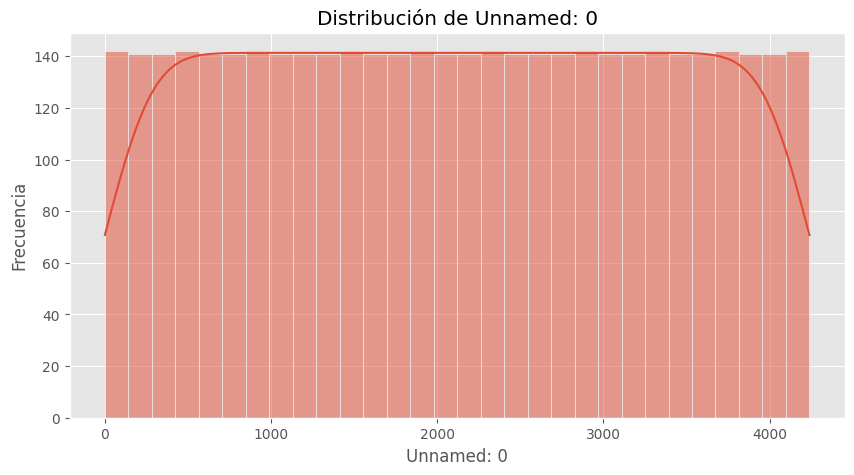

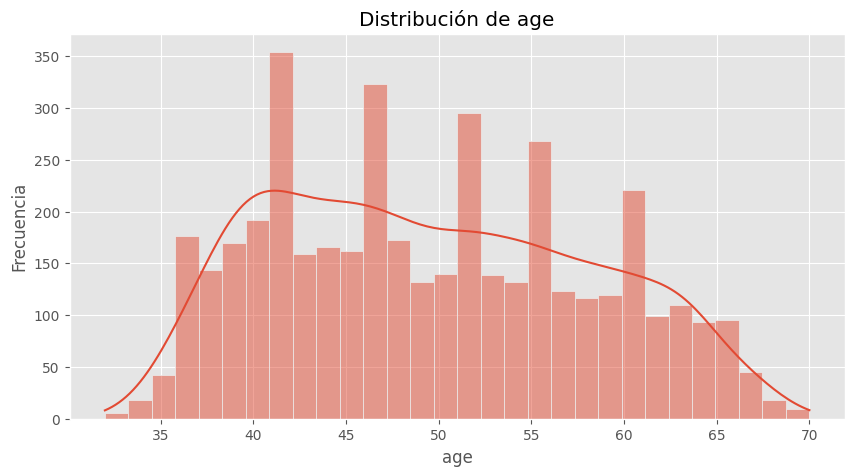

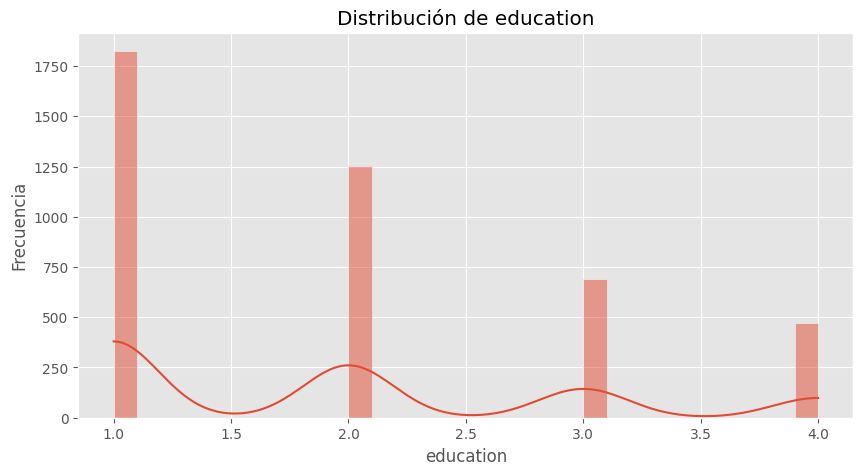

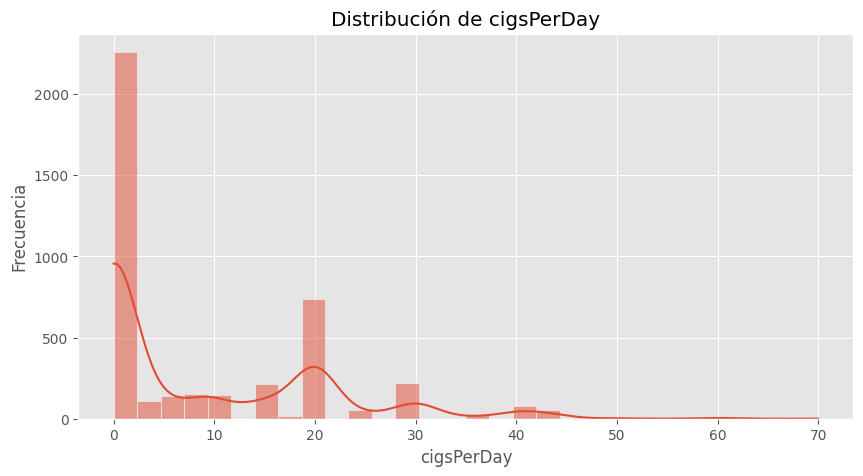

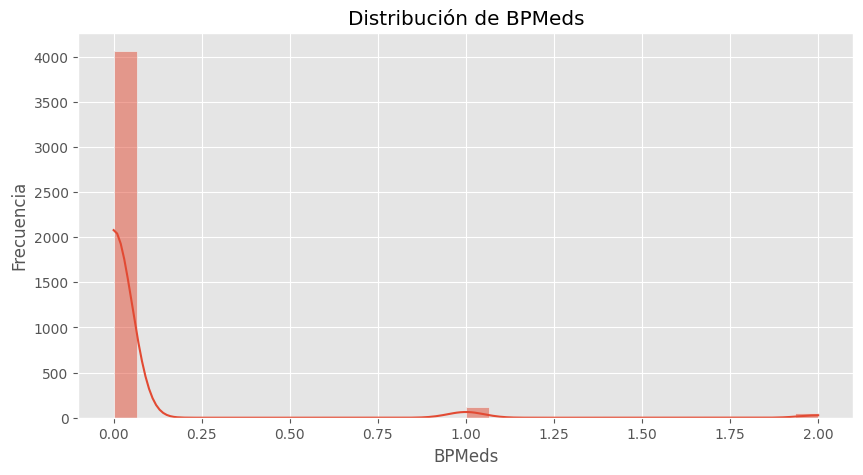

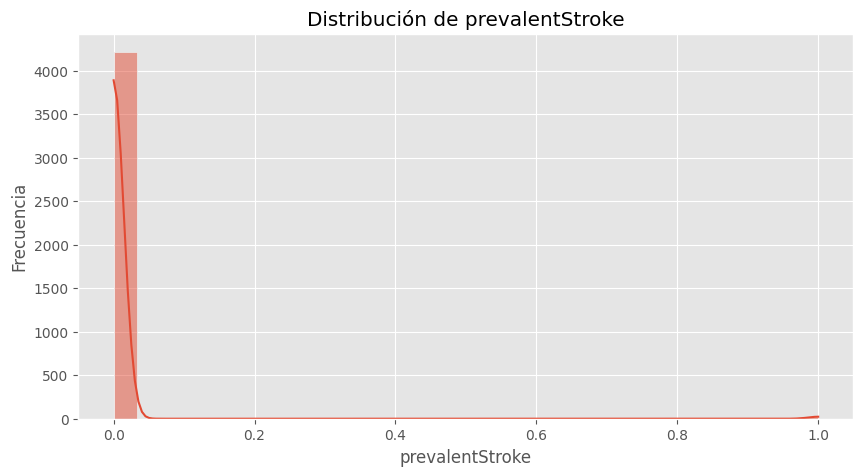

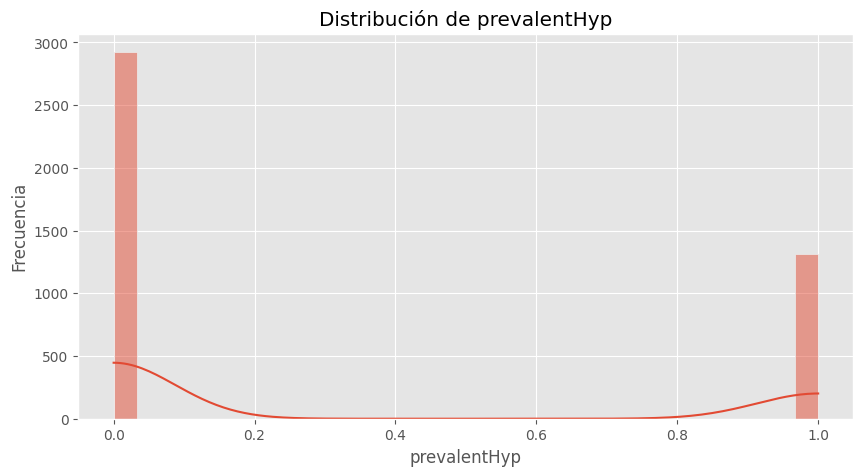

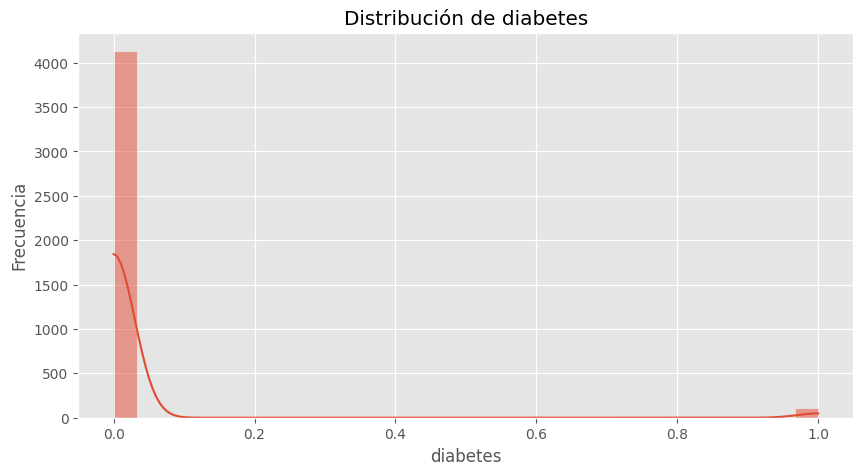

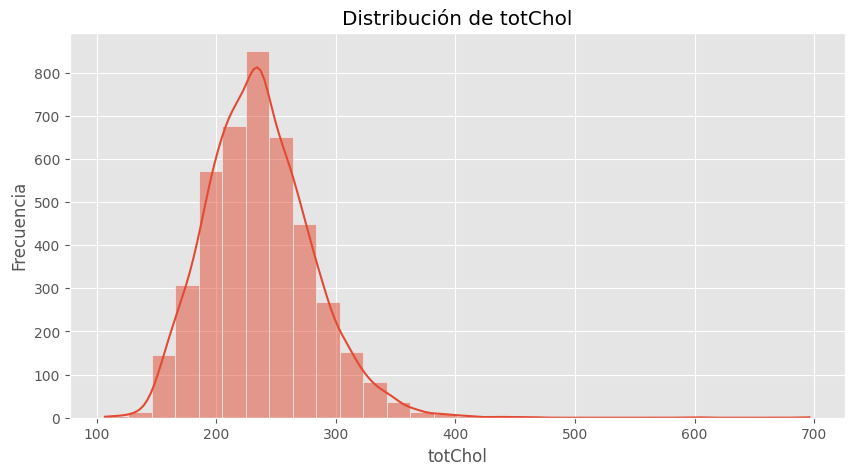

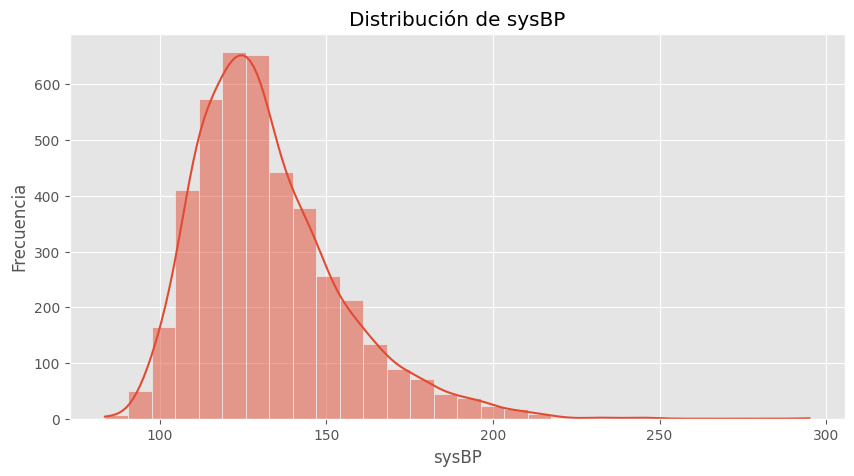

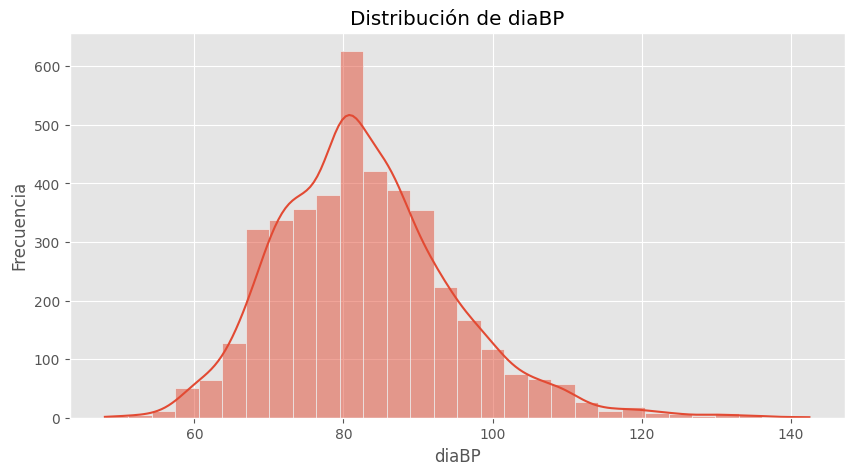

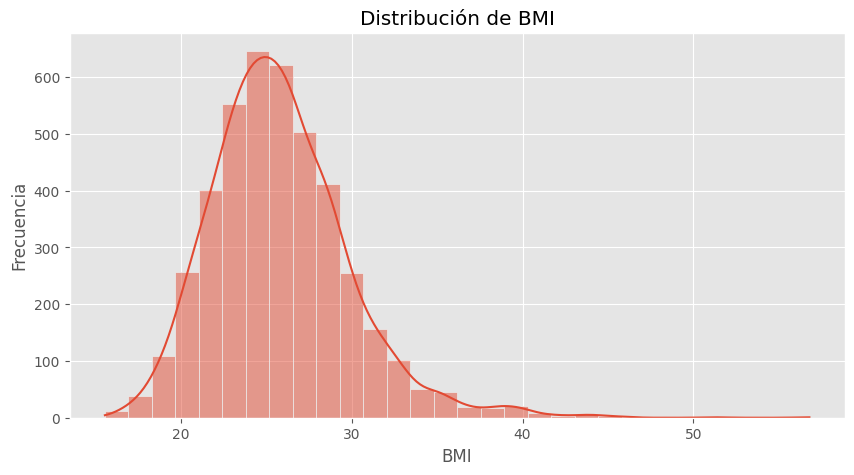

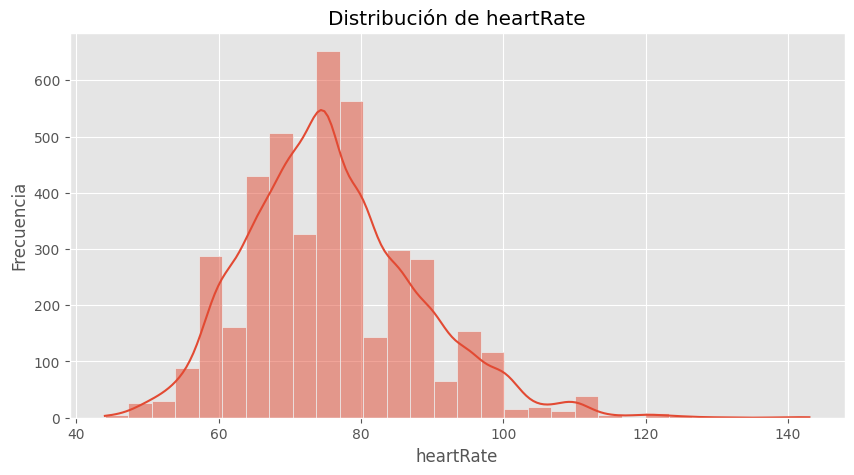

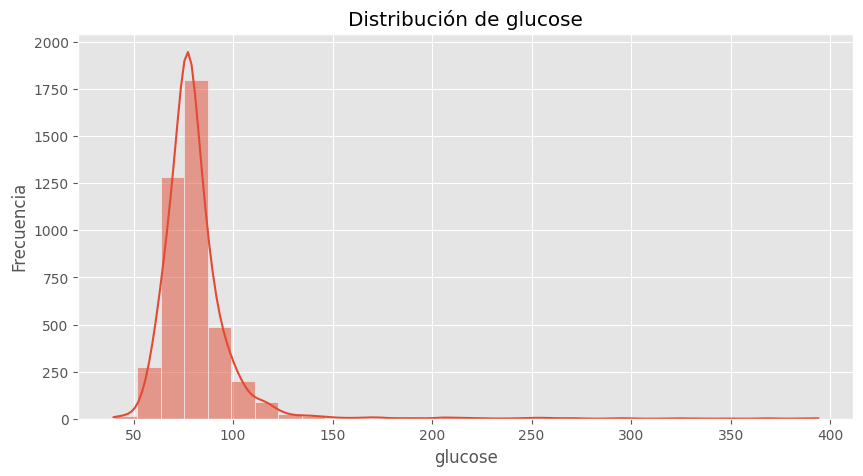

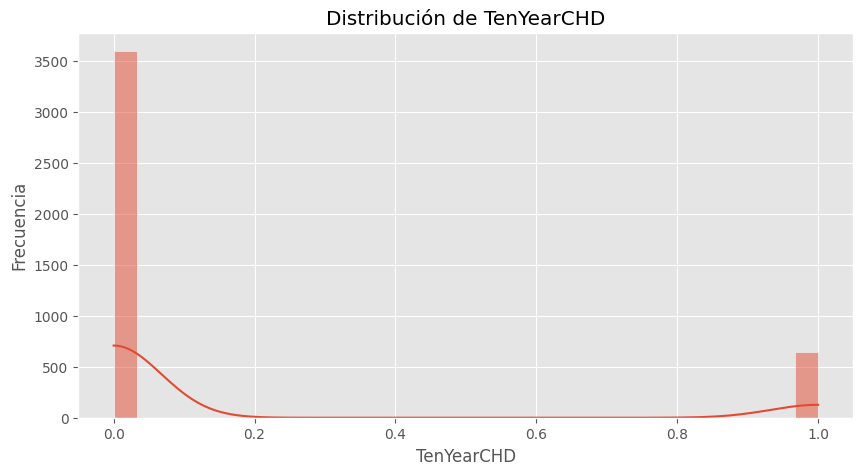

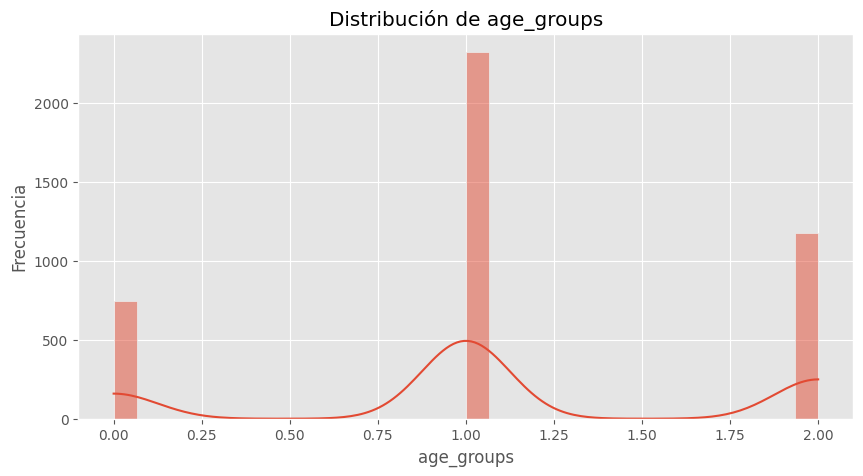

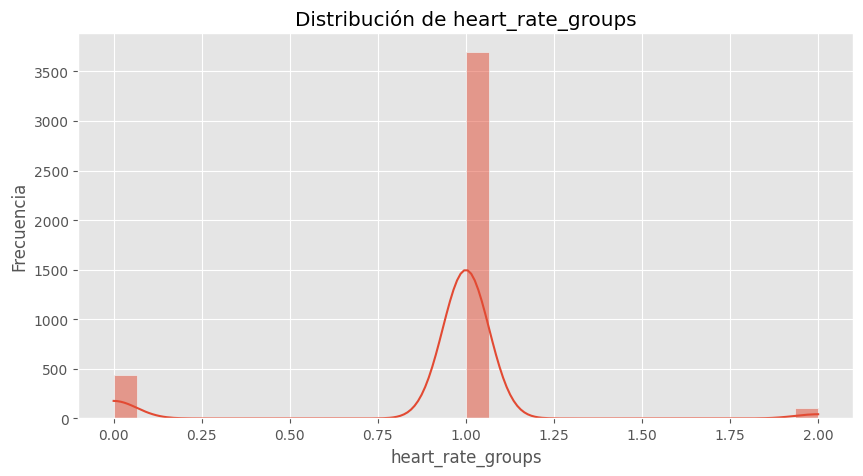

In [ ]:
# Análisis Univariado
# Crear histogramas y gráficos de densidad para variables numéricas
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns

for var in numeric_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

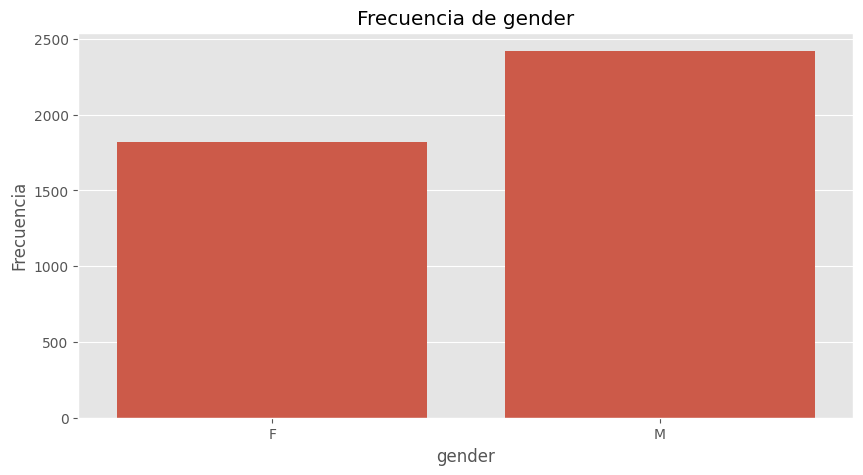

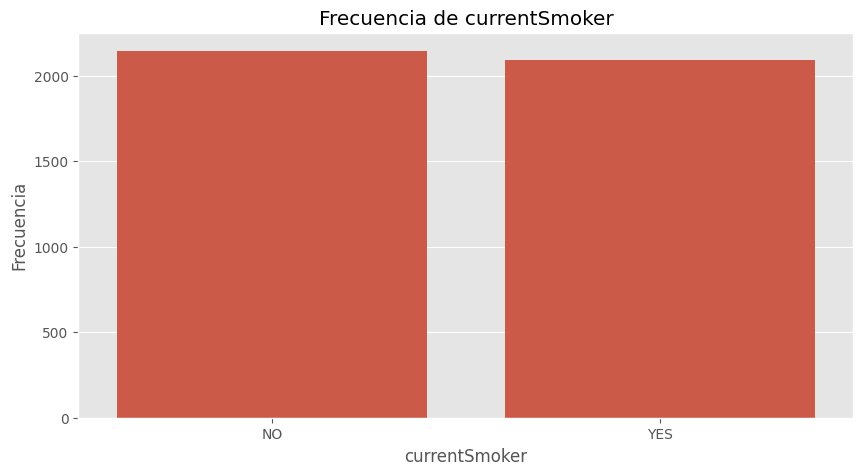

In [ ]:
# Crear gráficos de barras para variables categóricas
categorical_vars = data.select_dtypes(include=['object']).columns

for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=data)
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

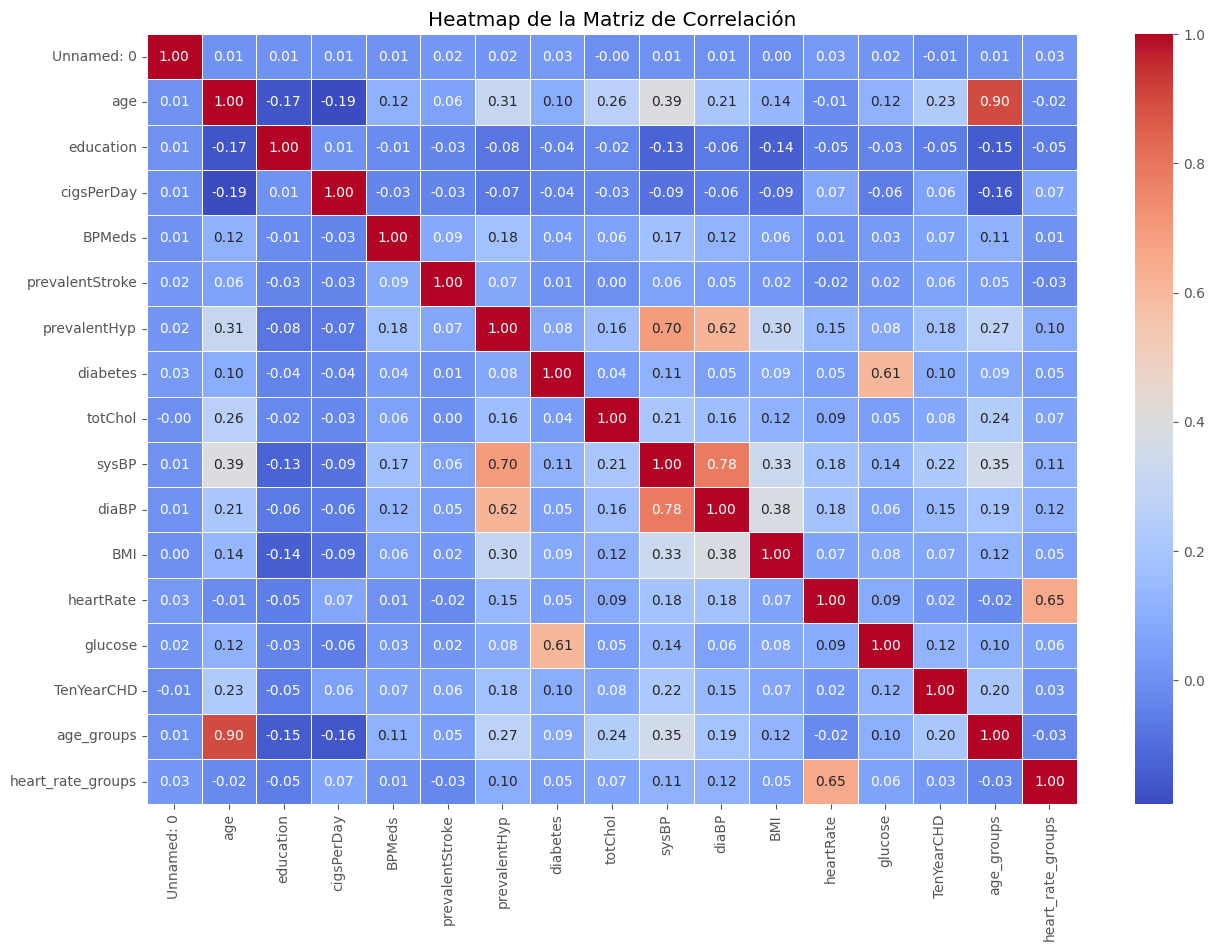

In [ ]:
# Matriz de correlación y heatmap
# Solo  columnas numéricas
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

In [ ]:
# Definir variables numéricas y categóricas
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = data.select_dtypes(include=['object']).columns

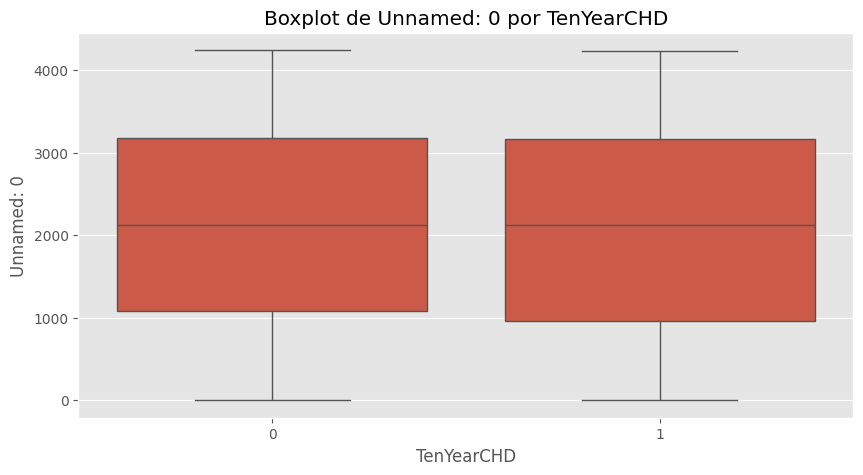

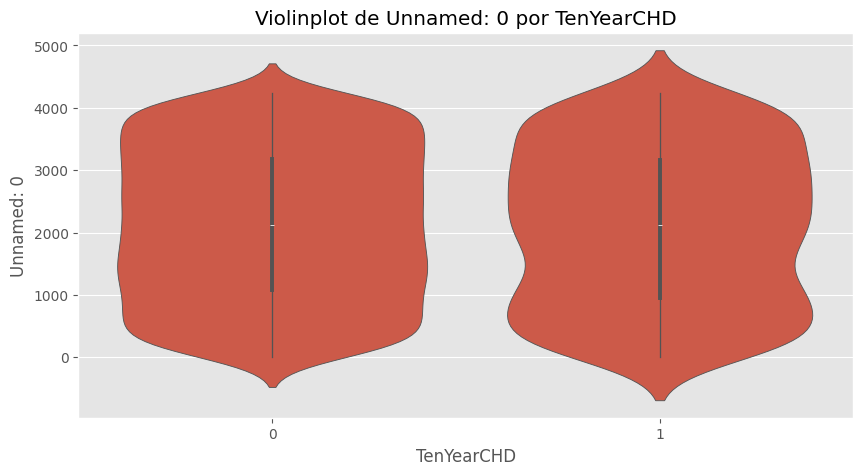

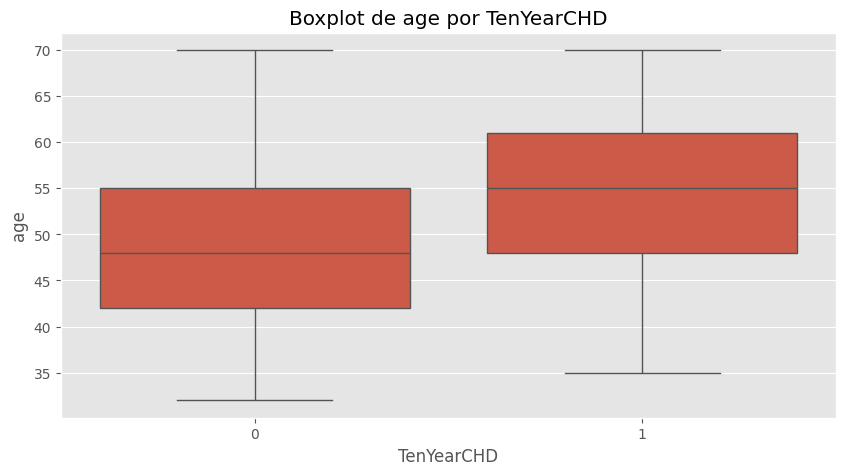

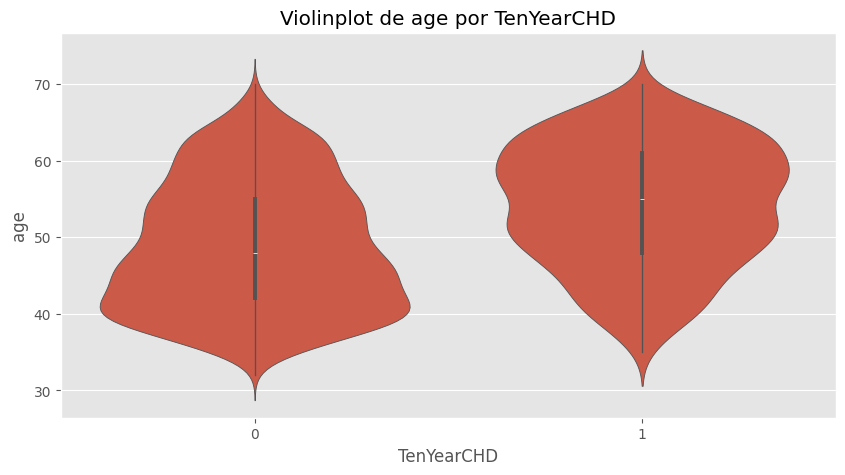

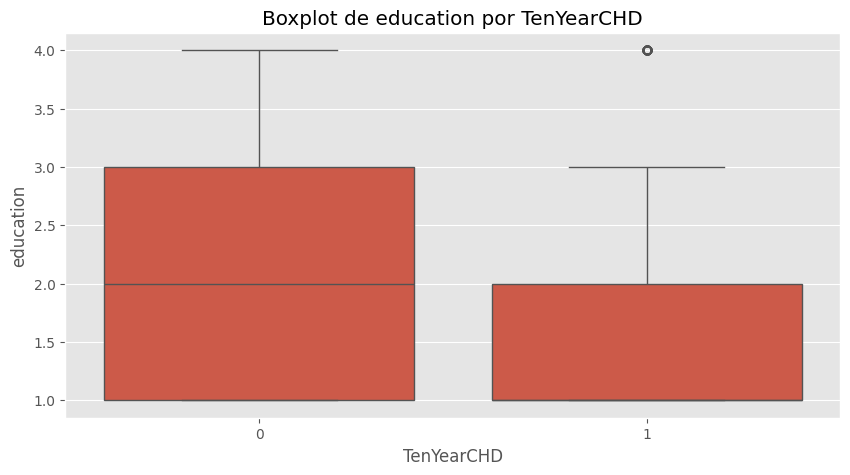

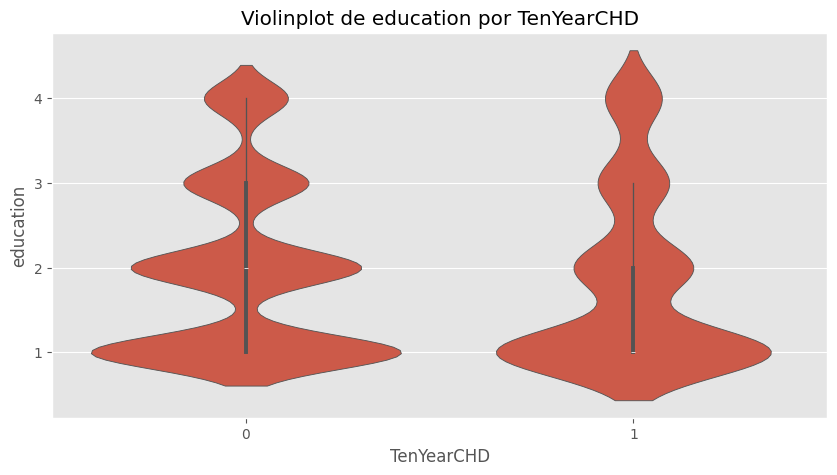

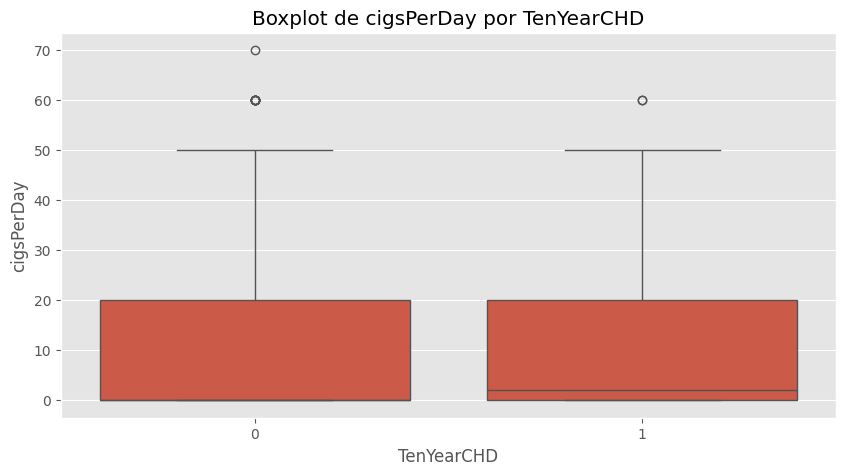

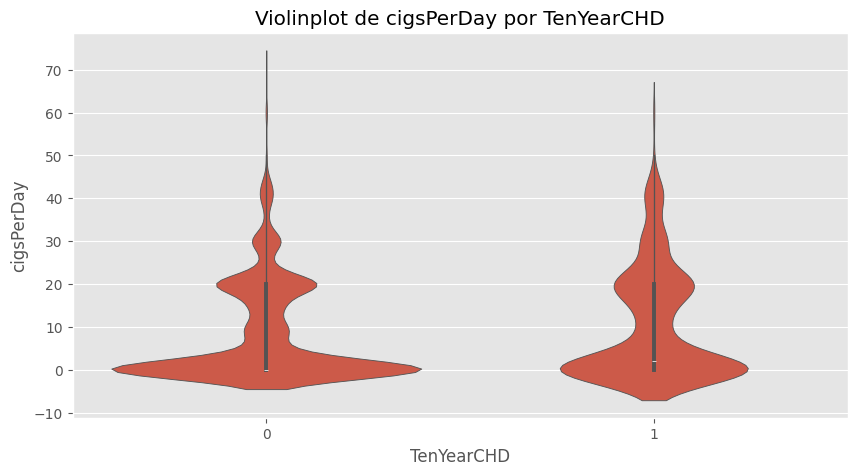

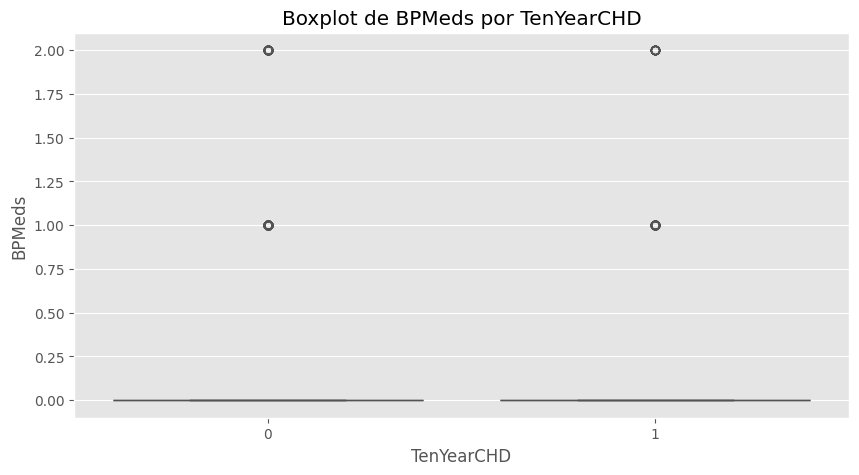

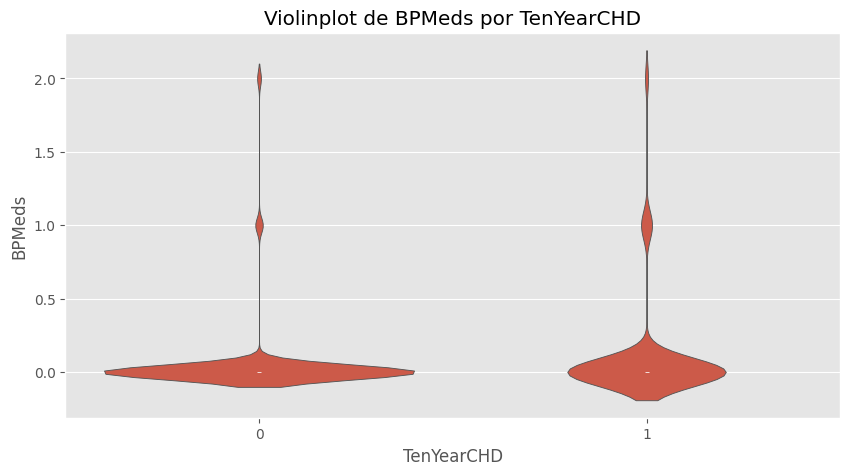

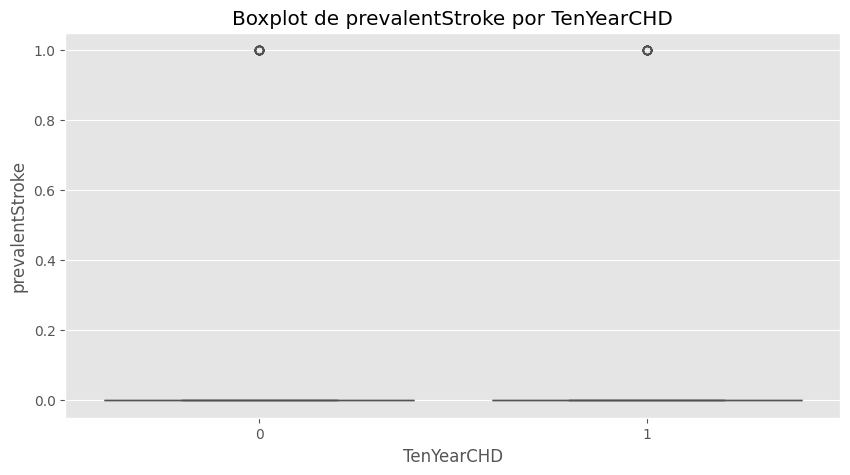

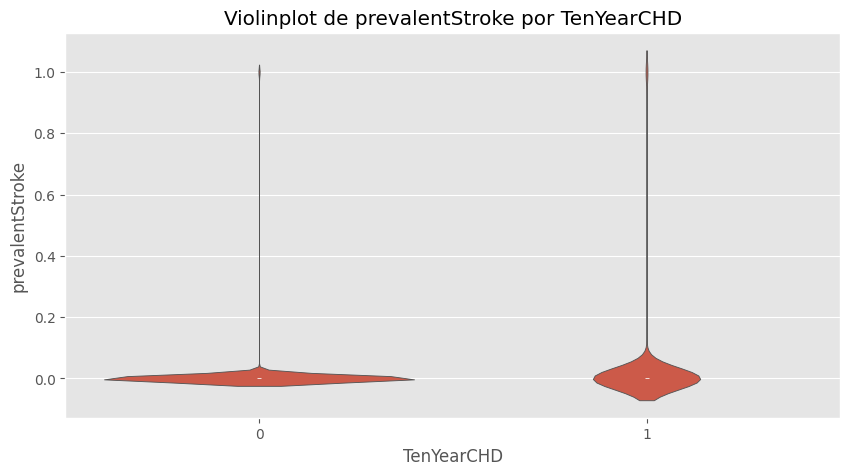

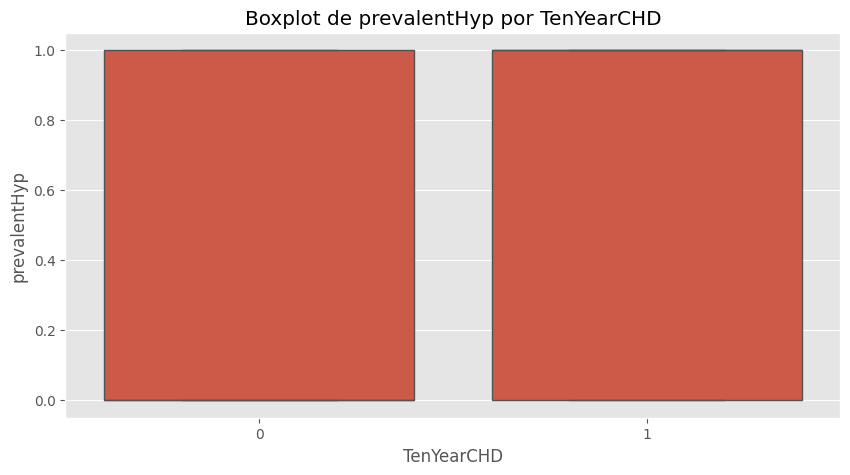

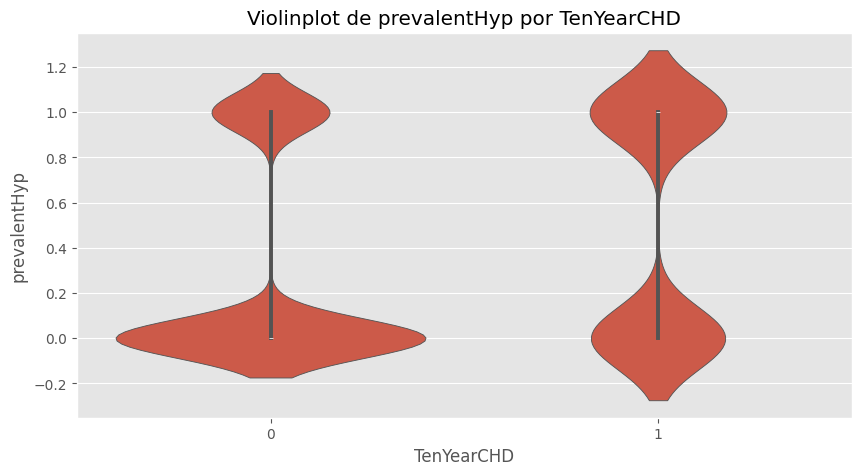

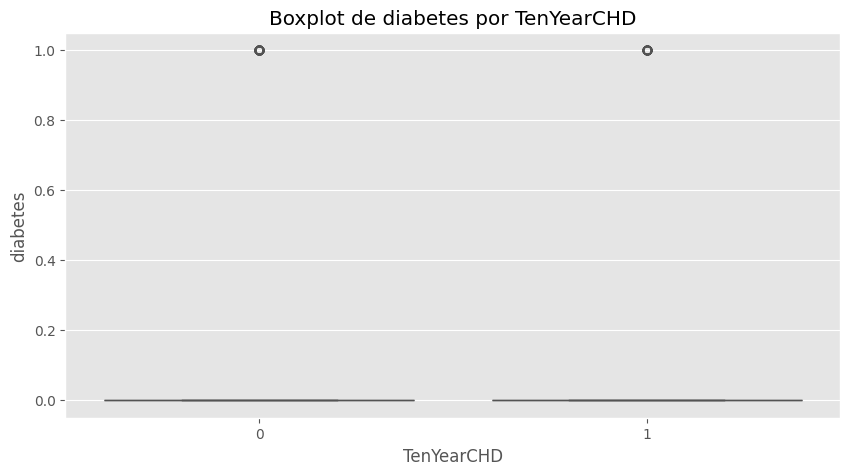

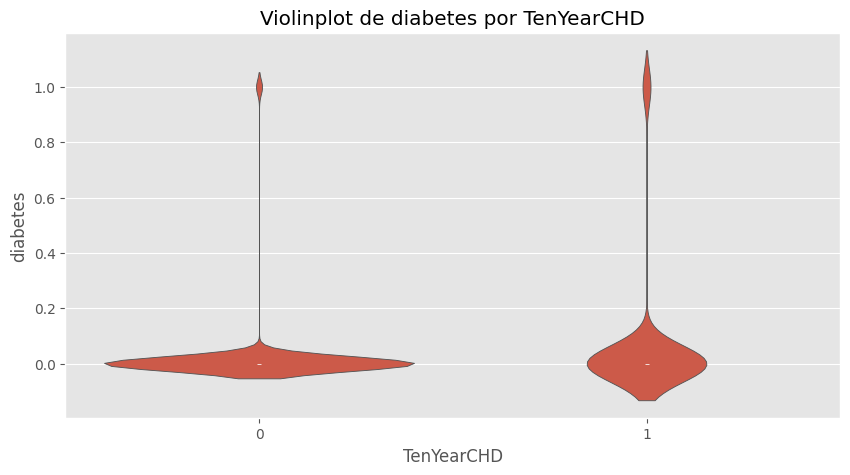

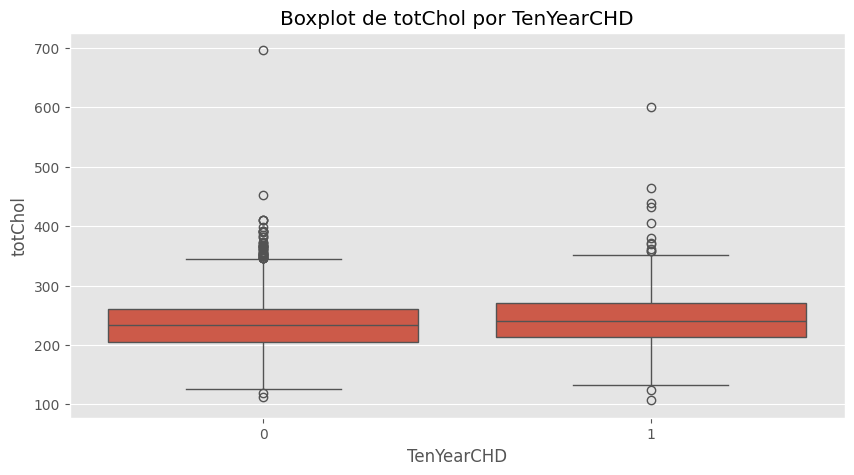

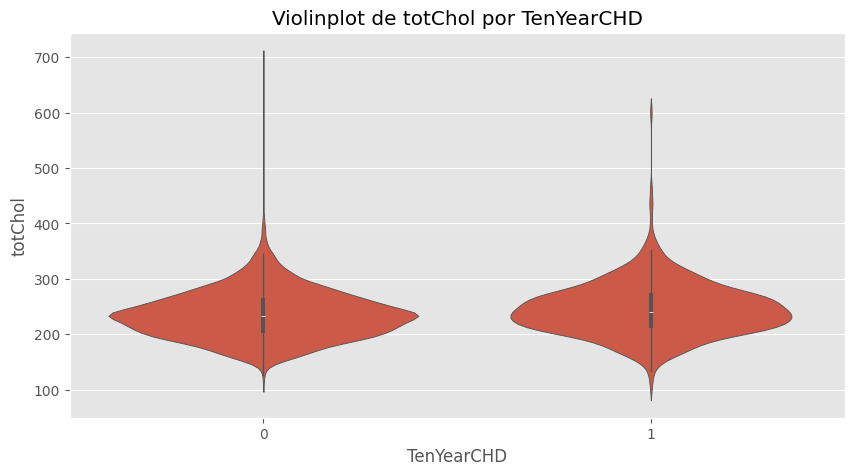

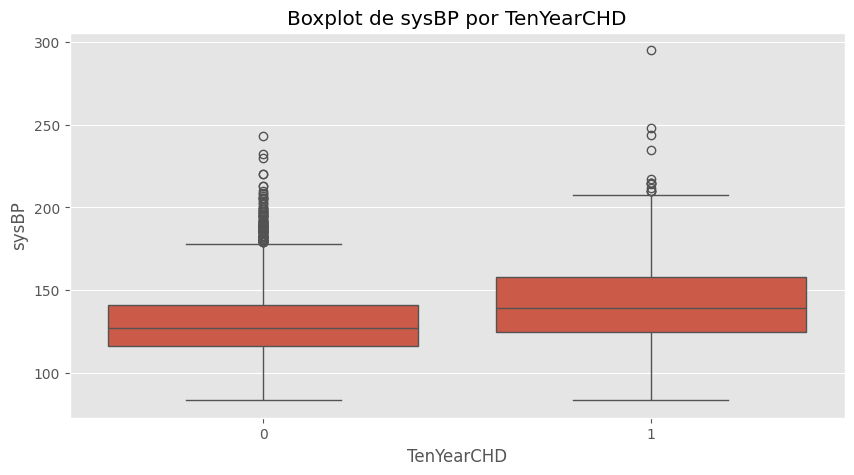

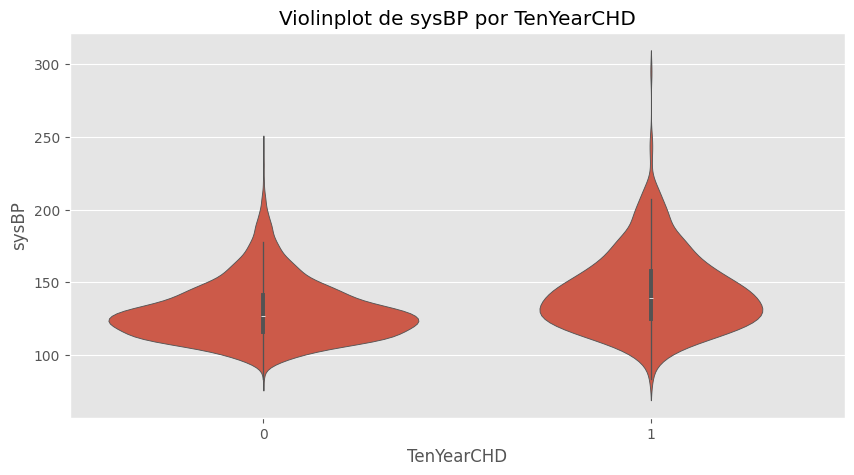

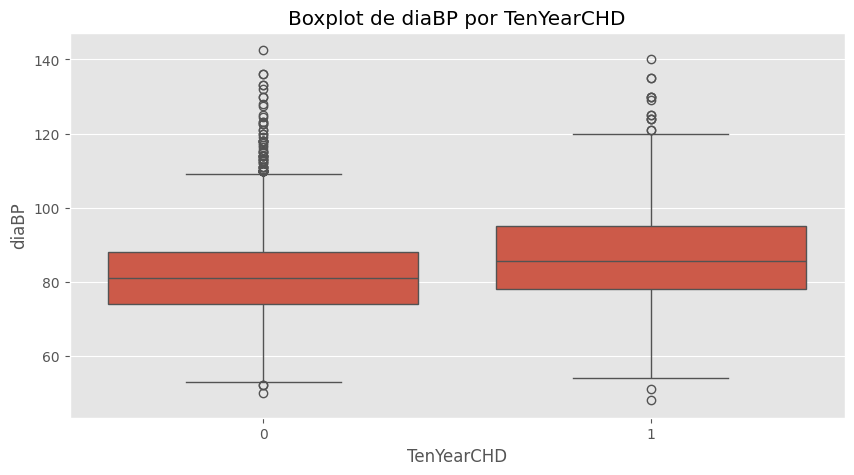

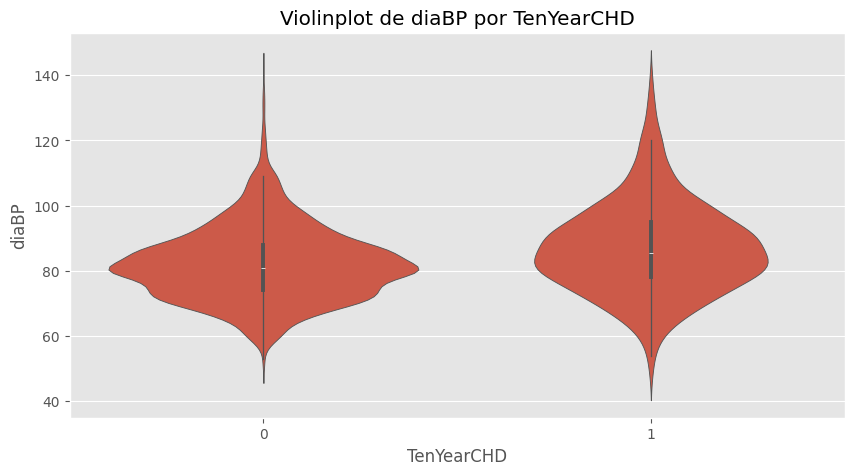

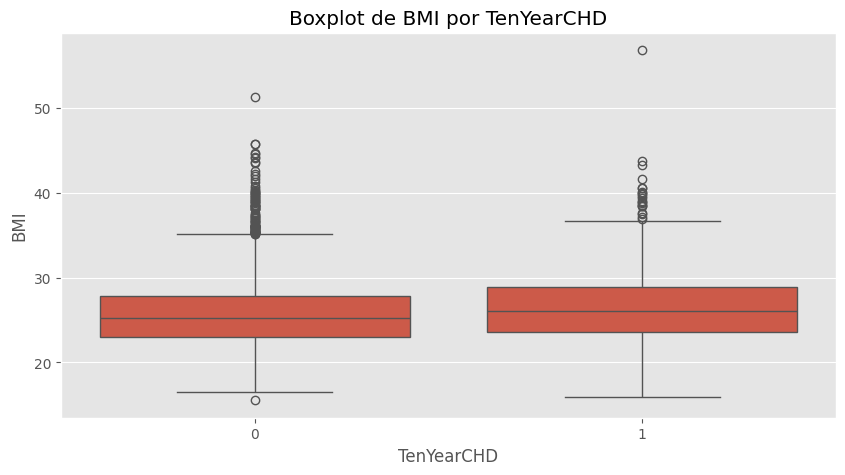

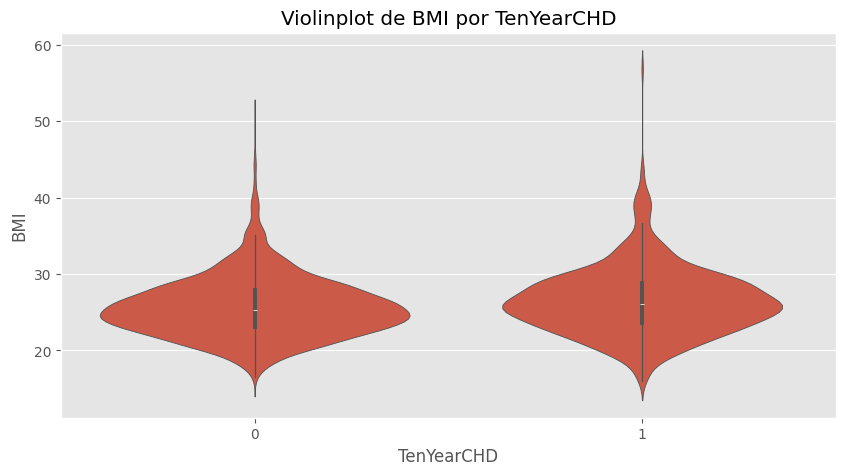

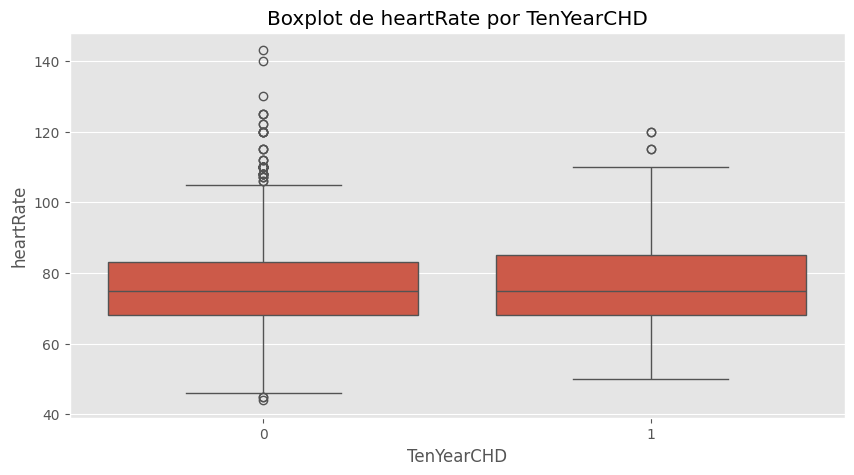

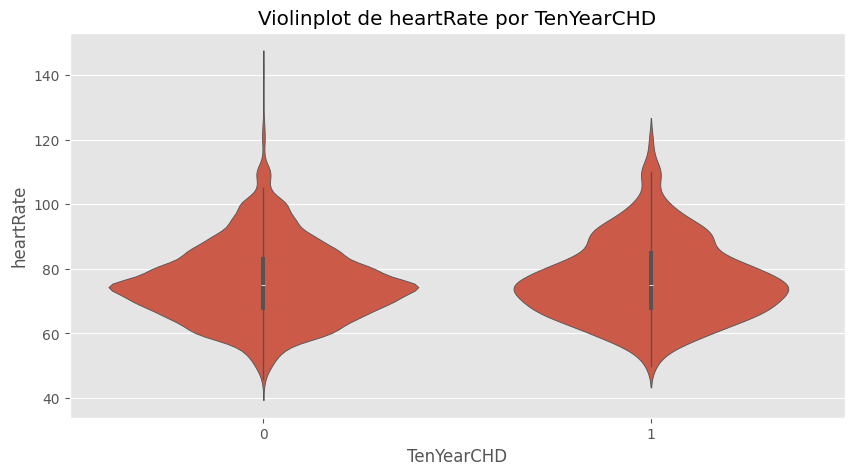

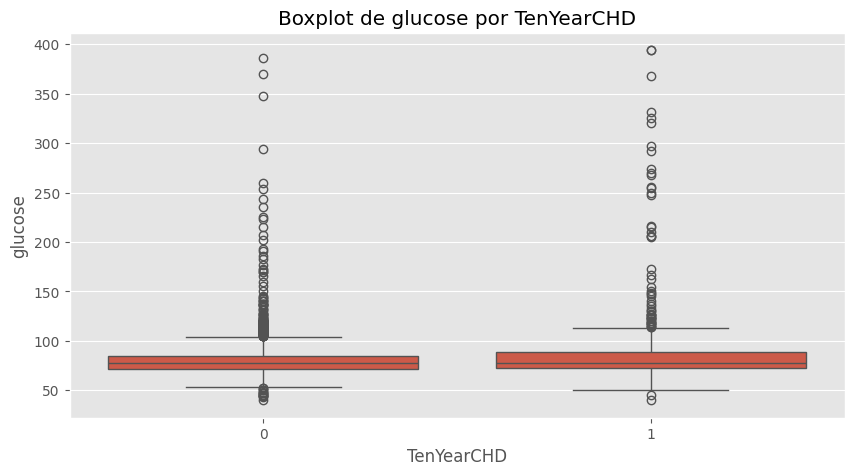

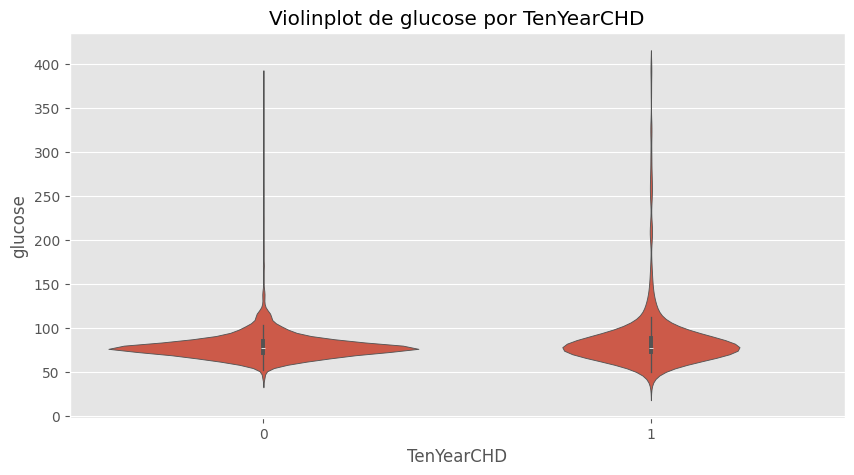

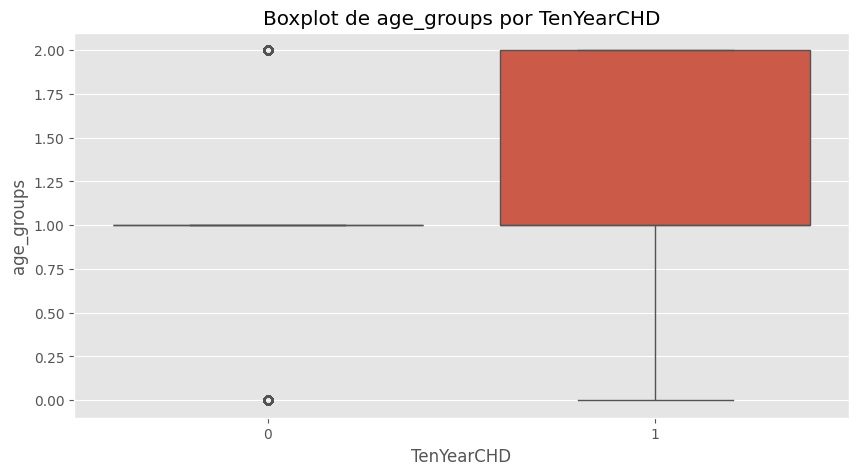

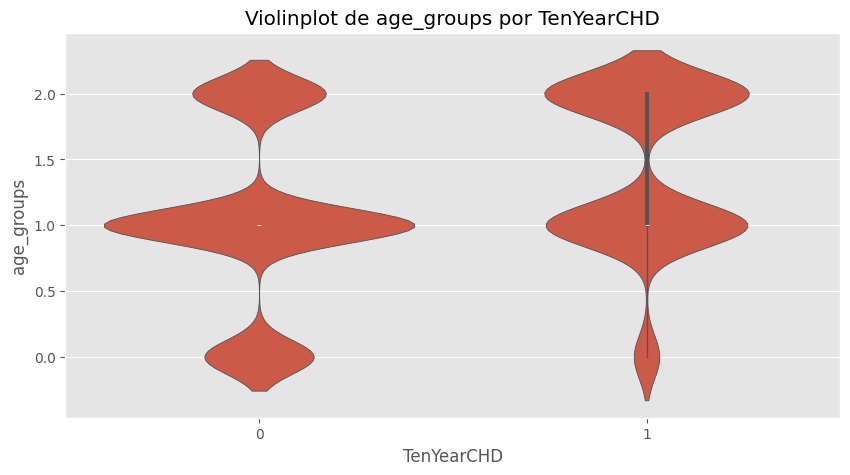

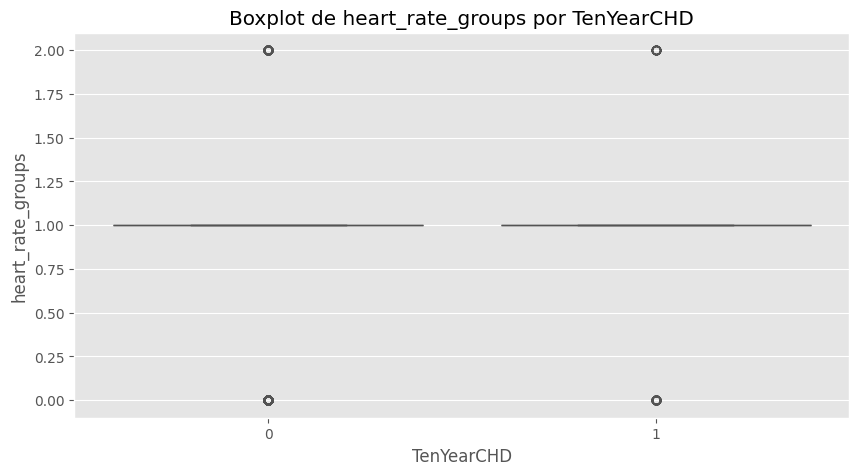

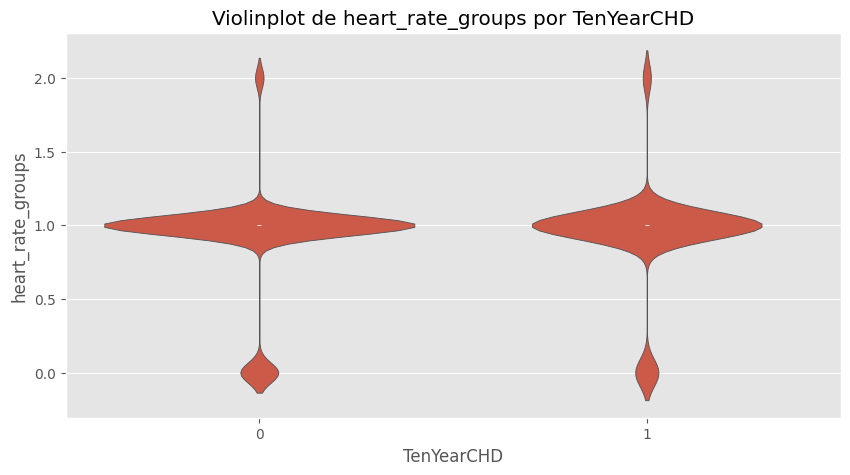

In [ ]:
# Análisis Categórico Bivariado
# Variable objetivo
target_var = 'TenYearCHD'  # Se reemplaza con la columna objetivo

# Crear gráficos de cajas y violines para variables numéricas por grupo de TenYearCHD
for var in numeric_vars:
    if var != target_var:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target_var, y=var, data=data)
        plt.title(f'Boxplot de {var} por {target_var}')
        plt.xlabel(target_var)
        plt.ylabel(var)
        plt.show()

        plt.figure(figsize=(10, 5))
        sns.violinplot(x=target_var, y=var, data=data)
        plt.title(f'Violinplot de {var} por {target_var}')
        plt.xlabel(target_var)
        plt.ylabel(var)
        plt.show()


In [ ]:
# Análisis de relaciones categóricas con TenYearCHD usando tablas de contingencia y chi-cuadrado
def chi_square_test(var):
    contingency_table = pd.crosstab(data[var], data[target_var])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return contingency_table, chi2, p

In [ ]:
# Variables categóricas a analizar
categorical_vars_for_chi2 = ['gender', 'currentSmoker', 'education', 'prevalentStroke', 'prevalentHyp', 'diabetes']

for var in categorical_vars_for_chi2:
    contingency_table, chi2, p = chi_square_test(var)
    print(f'Tabla de contingencia para {var}:\n', contingency_table)
    print(f'Estadístico chi-cuadrado: {chi2}')
    print(f'Valor p: {p}\n')

Tabla de contingencia para gender:
 TenYearCHD     0    1
gender               
F           1477  343
M           2119  301
Estadístico chi-cuadrado: 32.61833491071199
Valor p: 1.1215175755662674e-08

Tabla de contingencia para currentSmoker:
 TenYearCHD        0    1
currentSmoker           
NO             1834  311
YES            1762  333
Estadístico chi-cuadrado: 1.4972035438574873
Valor p: 0.2211021442164888

Tabla de contingencia para education:
 TenYearCHD     0    1
education            
1           1486  339
2           1106  147
3            601   88
4            403   70
Estadístico chi-cuadrado: 31.051850034062287
Valor p: 8.289453270159487e-07

Tabla de contingencia para prevalentStroke:
 TenYearCHD          0    1
prevalentStroke           
0                3582  633
1                  14   11
Estadístico chi-cuadrado: 14.033657261599943
Valor p: 0.0001795675785918809

Tabla de contingencia para prevalentHyp:
 TenYearCHD       0    1
prevalentHyp           
0             

Crear Grupos de Edad

Convertir la edad en categorías para capturar diferencias en grupos de edad.

In [ ]:
data['age_group'] = pd.cut(data['age'], bins=[30, 40, 50, 60, 70], labels=['30-40', '40-50', '50-60', '60-70'])


Interacción entre sysBP y diaBP

Crear una característica que represente la interacción entre la presión arterial sistólica y diastólica.

In [ ]:
data['BP_interaction'] = data['sysBP'] * data['diaBP']


 Codificación de Variables Categóricas

Aplicar one-hot encoding a gender y currentSmoker.

In [ ]:
data = pd.get_dummies(data, columns=['gender', 'currentSmoker'])


Ratio Colesterol/Edad

Crear una nueva característica que sea el ratio del colesterol total dividido por la edad.

In [ ]:
data['chol_age_ratio'] = data['totChol'] / data['age']


Ingeniería avanzada de características

- Características polinómicas:

Se crean características polinómicas y de interacción para capturar relaciones no lineales.

In [ ]:
# Extracción de polinomios
# Crear interacciones polinómicas para las variables de edad y presión arterial sistólica
poly = PolynomialFeatures(degree=2, include_bias=False)
age_sysBP_poly = poly.fit_transform(data[['age', 'sysBP']])
age_sysBP_poly_df = pd.DataFrame(age_sysBP_poly, columns=['age', 'sysBP', 'age^2', 'age*sysBP', 'sysBP^2'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.18763714281793295
Calinski-Harabasz Score: 793.9568624111621
Davies-Bouldin Score: 2.0964769527017157


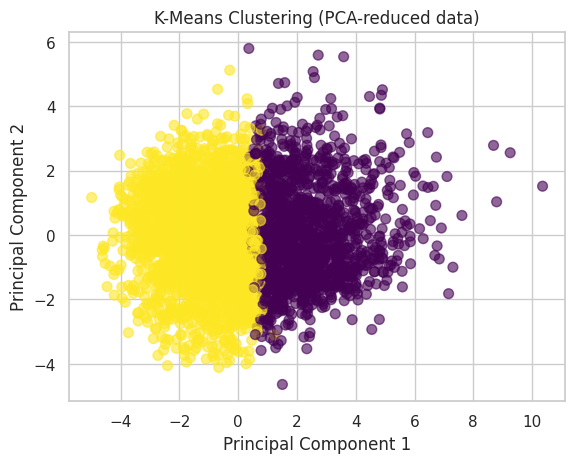

In [ ]:
# Importar las librerías necesarias

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt


# Separar características y variable objetivo
X = data.drop(columns=['TenYearCHD', 'Unnamed: 0'])
y = data['TenYearCHD']

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamiento de datos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar el preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Reducción de dimensionalidad para visualización (usando PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Aplicar K-Means con diferentes números de clusters para encontrar el óptimo
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_processed)
clusters = kmeans.predict(X_processed)

# Evaluación de Clusters
silhouette_avg = silhouette_score(X_processed, clusters)
calinski_harabasz = calinski_harabasz_score(X_processed, clusters)
davies_bouldin = davies_bouldin_score(X_processed, clusters)

# Mostrar los resultados de las métricas de clustering
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

# Visualización de clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.title('K-Means Clustering (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separar características y variable objetivo
X = data.drop(columns=['TenYearCHD', 'Unnamed: 0'])
y = data['TenYearCHD']

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamiento de datos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluar el modelo
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
roc_auc_result = roc_auc_score(y_test, y_pred_proba)

print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
print("ROC-AUC Score:\n", roc_auc_result)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.59      0.08      0.14       123

    accuracy                           0.86       848
   macro avg       0.73      0.54      0.53       848
weighted avg       0.82      0.86      0.81       848

Confusion Matrix:
 [[718   7]
 [113  10]]
ROC-AUC Score:
 0.7079338379590694


 Balanceo de clases usando SMOTE y modelo alternativo de Random Forest:

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Cargar el dataset
data = pd.read_csv('/content/framingham_clean.csv')

# Reemplazar valores 'Missing' en la columna BPMeds
data['BPMeds'] = data['BPMeds'].replace('Missing', 2).astype(float)

# Convertir las columnas categóricas a numéricas
data['gender'] = data['gender'].astype(str).replace(['0', '1'], ['M', 'F'])
data['currentSmoker'] = data['currentSmoker'].astype(str).replace(['0', '1'], ['NO', 'YES'])

# Convertir variables categóricas a numéricas
data['gender'] = data['gender'].replace({'M': 0, 'F': 1}).astype(int)
data['currentSmoker'] = data['currentSmoker'].replace({'NO': 0, 'YES': 1}).astype(int)

# Separar características y variable objetivo
X = data.drop(columns=['TenYearCHD', 'Unnamed: 0'])
y = data['TenYearCHD']

# Asegurarse de que todas las columnas sean numéricas
X = X.apply(pd.to_numeric)

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamiento de datos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Balanceo de clases usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# División del dataset balanceado en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42))])

# Ajuste de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Evaluar el modelo
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
roc_auc_result = roc_auc_score(y_test, y_pred_proba)

print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
print("ROC-AUC Score:\n", roc_auc_result)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       745
           1       0.87      0.90      0.88       694

    accuracy                           0.89      1439
   macro avg       0.89      0.89      0.89      1439
weighted avg       0.89      0.89      0.89      1439

Confusion Matrix:
 [[650  95]
 [ 70 624]]
ROC-AUC Score:
 0.9591658124286792


 Análisis de Importancia de Características


In [ ]:
# Obtener el mejor modelo del grid search
best_model = grid_search.best_estimator_

# Extraer el modelo de Random Forest del pipeline
rf_model = best_model.named_steps['classifier']

# Importancia de características
importances = rf_model.feature_importances_
features = X.columns

# Crear un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)


Feature Importances:
               Feature  Importance
1                 age    0.139131
10              sysBP    0.130709
11              diaBP    0.108568
9             totChol    0.107006
12                BMI    0.096653
14            glucose    0.095779
13          heartRate    0.089463
4          cigsPerDay    0.072427
2           education    0.041238
5              BPMeds    0.028765
15         age_groups    0.022666
3       currentSmoker    0.021768
0              gender    0.015834
16  heart_rate_groups    0.013903
7        prevalentHyp    0.011365
8            diabetes    0.003580
6     prevalentStroke    0.001145


Guardar el Modelo

In [ ]:
import joblib

# Guardar el modelo entrenado
joblib.dump(best_model, 'best_random_forest_model.pkl')

# Cargar el modelo entrenado (ejemplo de cómo cargarlo más tarde)
# loaded_model = joblib.load('best_random_forest_model.pkl')


['best_random_forest_model.pkl']

Validación Adicional


In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 folds
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')

print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC Score:", cv_scores.mean())


Cross-Validation ROC-AUC Scores: [0.89706382 0.97393564 0.97775171 0.97839972 0.97958357]
Mean ROC-AUC Score: 0.9613468913085856


Revisión de predicciones y el análisis de casos correctos e incorrectos

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_test_pred = grid_search.predict(X_test)
y_test_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Crear un DataFrame para comparar las predicciones con los valores reales
predictions_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})

# Mostrar las primeras filas del DataFrame
print(predictions_comparison.head(10))

# Filtrar los casos donde el modelo predijo correctamente y donde falló
correct_predictions = predictions_comparison[predictions_comparison['Actual'] == predictions_comparison['Predicted']]
incorrect_predictions = predictions_comparison[predictions_comparison['Actual'] != predictions_comparison['Predicted']]

print("Correct Predictions:\n", correct_predictions.head())
print("Incorrect Predictions:\n", incorrect_predictions.head())


      Actual  Predicted  Predicted_Probability
4054       0          0                  0.390
3813       0          0                  0.245
5065       1          1                  0.765
4339       1          1                  0.780
1615       0          0                  0.135
4076       1          1                  0.775
5380       1          1                  0.850
132        0          0                  0.425
308        0          0                  0.150
5163       1          1                  0.805
Correct Predictions:
       Actual  Predicted  Predicted_Probability
4054       0          0                  0.390
3813       0          0                  0.245
5065       1          1                  0.765
4339       1          1                  0.780
1615       0          0                  0.135
Incorrect Predictions:
       Actual  Predicted  Predicted_Probability
3768       1          0                  0.215
6032       1          0                  0.470
3918       1  

Análisis de Importancia de Características:

Determina cuáles características están influyendo más en las predicciones del modelo.

Feature Importances:
               Feature  Importance
1                 age    0.139131
10              sysBP    0.130709
11              diaBP    0.108568
9             totChol    0.107006
12                BMI    0.096653
14            glucose    0.095779
13          heartRate    0.089463
4          cigsPerDay    0.072427
2           education    0.041238
5              BPMeds    0.028765
15         age_groups    0.022666
3       currentSmoker    0.021768
0              gender    0.015834
16  heart_rate_groups    0.013903
7        prevalentHyp    0.011365
8            diabetes    0.003580
6     prevalentStroke    0.001145


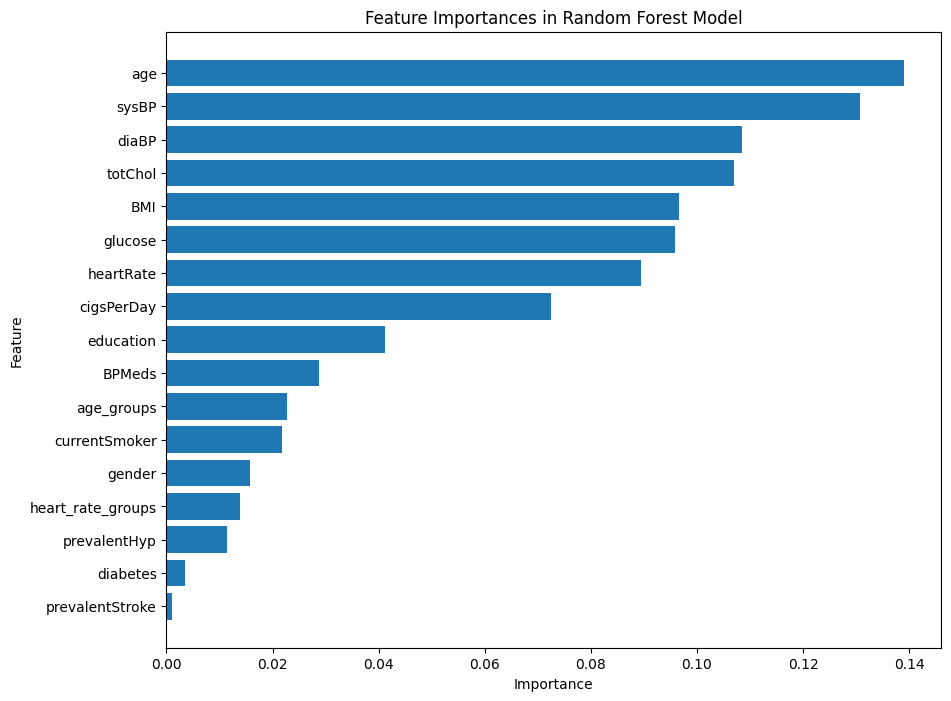

In [ ]:
# Obtener el mejor modelo del grid search
best_model = grid_search.best_estimator_

# Extraer el modelo de Random Forest del pipeline
rf_model = best_model.named_steps['classifier']

# Importancia de características
importances = rf_model.feature_importances_
features = X.columns

# Crear un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)

# Visualización de la importancia de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


Guardar el modelo nuevamente

In [ ]:
import joblib

# Guardar el modelo entrenado
joblib.dump(best_model, 'best_random_forest_model.pkl')

# Cargar el modelo entrenado (ejemplo de cómo cargarlo más tarde)
# loaded_model = joblib.load('best_random_forest_model.pkl')


['best_random_forest_model.pkl']